In [2]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [4]:
digits = load_digits()
x,y = digits.data,digits.target

**Plot images in dataset**

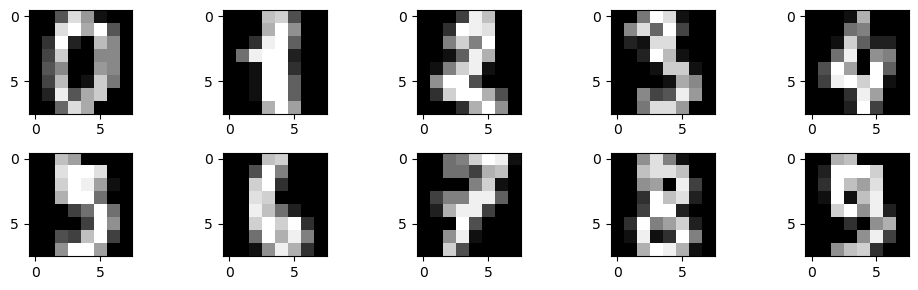

In [5]:
plt.figure(figsize =( 10,3))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(digits.images[i] , cmap = 'gray')
    plt.axis = ('off')
plt.tight_layout()
plt.show()

In [6]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [7]:
df = pd.DataFrame(digits.data , columns = digits.feature_names)
df['target'] = digits.target

In [8]:
from sklearn.model_selection import train_test_split

In [9]:

# Split the data
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns = ['target'] ), df['target'], test_size=0.3, random_state=42)

**Lgogistic regression for multiple class**

In [10]:
log_model = LogisticRegression(
     multi_class = 'multinomial',
     max_iter = 10000,
)
log_model.fit(x_train , y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=10000, multi_class='multinomial')

In [11]:
y_pred = log_model.predict(x_test)

In [14]:
pd.DataFrame(y_pred).value_counts()

0
5    67
4    58
9    58
6    54
0    53
3    53
7    53
1    49
2    49
8    46
Name: count, dtype: int64

In [29]:
print(accuracy_score (y_test,y_pred))

0.9685185185185186


In [30]:
print(classification_report (y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.96      0.94      0.95        50
           2       0.96      1.00      0.98        47
           3       0.98      0.96      0.97        54
           4       1.00      0.97      0.98        60
           5       0.94      0.95      0.95        66
           6       0.96      0.98      0.97        53
           7       1.00      0.96      0.98        55
           8       0.91      0.98      0.94        43
           9       0.97      0.95      0.96        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



**Confusion matrix**

In [31]:
print(confusion_matrix (y_test,y_pred))

[[53  0  0  0  0  0  0  0  0  0]
 [ 0 47  1  0  0  0  0  0  2  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  1 52  0  1  0  0  0  0]
 [ 0  1  0  0 58  0  1  0  0  0]
 [ 0  1  0  0  0 63  1  0  0  1]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  1  0 53  0  1]
 [ 0  0  0  0  0  1  0  0 42  0]
 [ 0  0  0  1  0  0  0  0  2 56]]


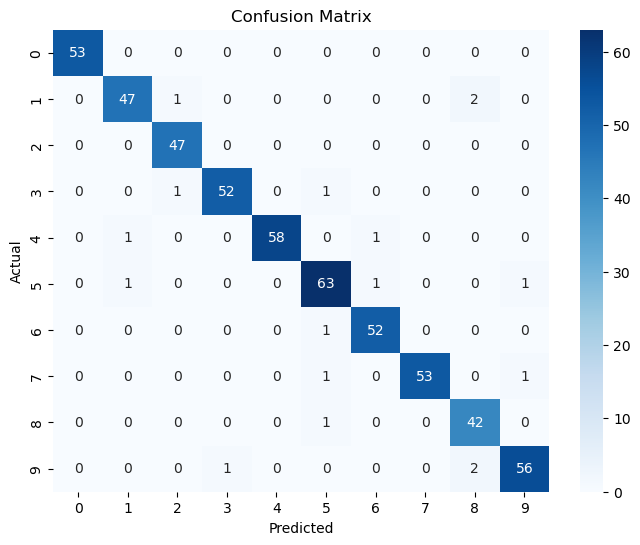

In [23]:
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize =( 8,6))
sns.heatmap(cm , annot =True , fmt = 'd',cmap = 'Blues',xticklabels = digits.target_names , yticklabels = digits.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

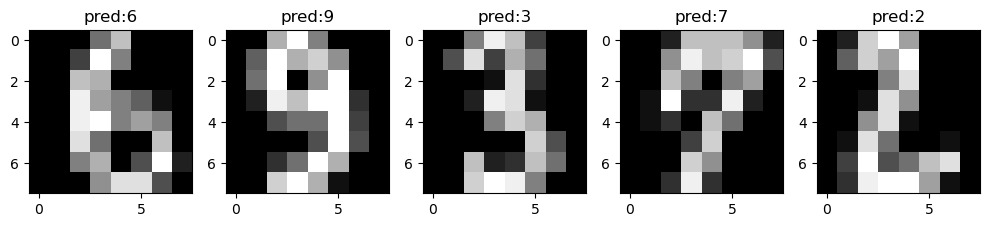

In [28]:
plt.figure(figsize =( 10,3))
li = [0,1,2,3,4]
for i,j in zip(x_test.index[:5], li):
    plt.subplot(1,5,j+1)
    plt.imshow(x_test.loc[i].values.reshape(8,8), cmap = 'gray')
    plt.title(f"pred:{y_pred[j]}")
    plt.axis = ('off')
plt.tight_layout()
plt.show()